In [82]:
import pandas as pd
import numpy as np
import calendar
import datetime as dt

df = pd.read_csv("2016_Yellow_Taxi_Trip_Data.csv",usecols=
                 ["tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","RatecodeID","payment_type","fare_amount"])

df.dropna(axis=0, how='any', inplace=True)
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount
0,2/1/16 20:48,2/1/16 20:57,1,2.3,0.000000,0.000000,1,0.000000,0.000000,1,9.5
1,2/9/16 19:08,2/9/16 19:28,1,2.9,-73.986984,40.750744,1,-73.977028,40.786922,1,15.0
2,2/1/16 13:50,2/1/16 13:55,1,1.2,-74.012428,40.706787,1,-74.002739,40.718765,1,6.0
3,2/27/16 15:14,2/27/16 15:18,1,1.0,-74.000092,40.737709,1,-74.002541,40.728539,2,5.5
4,2/10/16 13:34,2/10/16 14:22,2,17.6,-73.790359,40.643837,2,-73.982681,40.750008,2,52.0


# How many monthly pickups are there per month?

In [5]:
df['tpep_pickup_datetime'] = pd.to_datetime(df.tpep_pickup_datetime)
df['tpep_pickup_datetime'] = df.tpep_pickup_datetime.dt.month.apply(lambda x: calendar.month_abbr[x])
df1 = pd.DataFrame({'count': df.groupby(['tpep_pickup_datetime'], as_index=False).size()})
df1

,count
tpep_pickup_datetime,
Apr,74143
Feb,65522
Jan,63233
Jun,67330
Mar,66895
May,63698


Text(0.5,0,'Month')

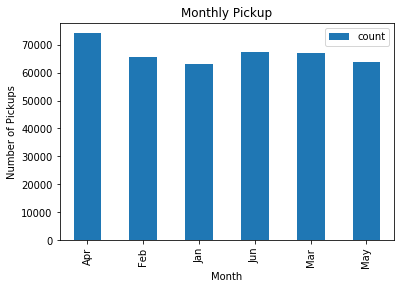

In [6]:
%matplotlib inline
my_plot = df1.plot(kind='bar',legend='True')
my_plot.set_title('Monthly Pickup')
my_plot.set_ylabel('Number of Pickups')
my_plot.set_xlabel('Month')

# Which month had the highest figure?

In [7]:
month = df1['count'].idxmax()
print("%s has the highest pickups" %month)
highest_count = df1['count'][df1['count'].idxmax()]
print("and the highest count is %d."%highest_count)

Apr has the highest pickups
and the highest count is 74143.


# What time of the day were most of the pickups, per month?

In [40]:
#January Pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_time'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
df['tpep_pickup_datetime'] = df.tpep_pickup_datetime.dt.month.apply(lambda x: calendar.month_abbr[x])
df1 = df.loc[df['tpep_pickup_datetime'] == 'Jan',['tpep_pickup_datetime','pickup_date','pickup_time']]
df1

,tpep_pickup_datetime,pickup_date,pickup_time
4560,Jan,2016-01-11,16
4561,Jan,2016-01-17,17
4562,Jan,2016-01-25,20
4563,Jan,2016-01-31,5
4564,Jan,2016-01-16,18
4565,Jan,2016-01-08,21
4566,Jan,2016-01-05,15
4567,Jan,2016-01-02,15
4568,Jan,2016-01-05,3
4569,Jan,2016-01-23,8


In [41]:
md = df1.loc[:,'pickup_time'].mode()
print("%d:00 hour of the day were the most of pickups on January." %md)

18:00 hour of the day were the most of pickups on January.


# What was the longest trip, per month?

In [55]:
df['tpep_pickup_datetime'] = pd.to_datetime(df.tpep_pickup_datetime)
df['tpep_pickup_datetime'] = df.tpep_pickup_datetime.dt.month.apply(lambda x: calendar.month_abbr[x])
df1 = df.loc[:,['tpep_pickup_datetime','trip_distance']]
df2 = df1.groupby('tpep_pickup_datetime').max()
df2

,trip_distance
tpep_pickup_datetime,
Apr,261466.5
Feb,151694.0
Jan,518.2
Jun,415.0
Mar,19072628.8
May,179.0


Text(0.5,0,'Month')

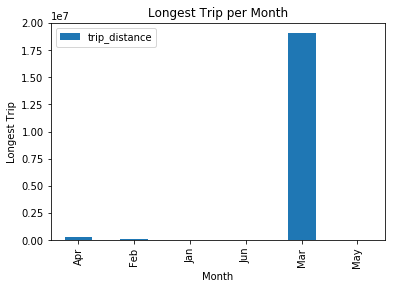

In [56]:
%matplotlib inline
my_plot = df2.plot(kind='bar',legend='True')
my_plot.set_title('Longest Trip per Month')
my_plot.set_ylabel('Longest Trip')
my_plot.set_xlabel('Month')

# Which month had the highest figure?

In [59]:
month = df1.set_index('tpep_pickup_datetime')['trip_distance'].idxmax()
print("%s has the longest trip" %month)
longest_trip = df1['trip_distance'][df1['trip_distance'].idxmax()]
print("and the distance is %.2f."%longest_trip)

Mar has the longest trip
and the distance is 19072628.80.


# What was the most expensive trip (excluding fees/tolls/tips), per month?

In [61]:
df['tpep_pickup_datetime'] = pd.to_datetime(df.tpep_pickup_datetime)
df['tpep_pickup_datetime'] = df.tpep_pickup_datetime.dt.month.apply(lambda x: calendar.month_abbr[x])
df.groupby('tpep_pickup_datetime')['fare_amount'].max().to_frame()

,fare_amount
tpep_pickup_datetime,
Apr,400.00
Feb,153231.93
Jan,568.50
Jun,300.00
Mar,700.00
May,350.00


Text(0.5,0,'Month')

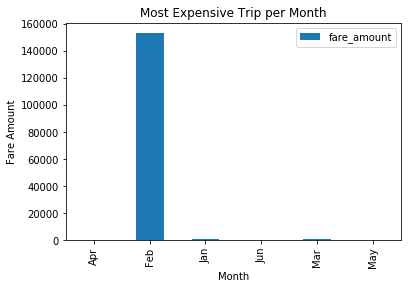

In [62]:
%matplotlib inline
my_plot = df.groupby('tpep_pickup_datetime')['fare_amount'].max().to_frame().plot(kind='bar',legend='True')
my_plot.set_title('Most Expensive Trip per Month')
my_plot.set_ylabel('Fare Amount')
my_plot.set_xlabel('Month')

# Which month had the highest figure?

In [63]:
month = df.set_index('tpep_pickup_datetime')['fare_amount'].idxmax()
print("%s has the highest figure or has the most expensive trip." %month)

Feb has the highest figure or has the most expensive trip.


# How many airport drop-offs are there per month, per airport? Which month and airport had the highest figure?

In [76]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df.tpep_dropoff_datetime)
df['tpep_dropoff_datetime'] = df.tpep_dropoff_datetime.dt.month.apply(lambda x: calendar.month_abbr[x])
df1=df.loc[df.RatecodeID.isin([2,3]),['tpep_dropoff_datetime','RatecodeID']]
df1['RatecodeID'].replace([2,3],['JFK','Newark'], inplace = True)
df2=pd.DataFrame({'count': df1.groupby(['tpep_dropoff_datetime','RatecodeID']).size()}).reset_index()
df2

,tpep_dropoff_datetime,RatecodeID,count
0,Apr,JFK,5034
1,Apr,Newark,175
2,Feb,JFK,4227
3,Feb,Newark,124
4,Jan,JFK,4192
5,Jan,Newark,115
6,Jul,JFK,7
7,Jun,JFK,4787
8,Jun,Newark,177
9,Mar,JFK,4924


array([<matplotlib.axes._subplots.AxesSubplot object at 0x16d2c8cc0>], dtype=object)

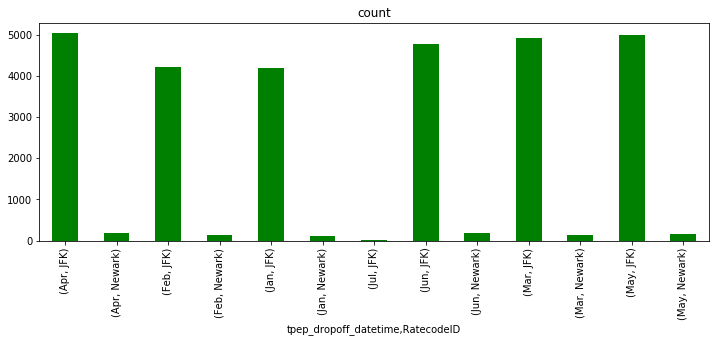

In [77]:
%matplotlib inline
my_plot = df2.plot(subplots=True,kind='bar',x=['tpep_dropoff_datetime','RatecodeID'],y='count',figsize=(12,4),legend=False,color=['g', 'b'])
my_plot


In [78]:
month = df2.set_index('tpep_dropoff_datetime')['count'].idxmax()
print("%s has the highest number of drop-offs" %month)
highest_num_trip = df2['count'][df2['count'].idxmax()]
print("and the highest number is %d."%highest_num_trip)
print("We can see from the figure above that JFK had the highest drop-offs per month.")

Apr has the highest number of drop-offs
and the highest number is 5034.
We can see from the figure above that JFK had the highest drop-offs per month.


# Which payment, made per month, had the highest occurrence, Cash or Credit Card? What were the total figures per type?

In [80]:
df['tpep_pickup_datetime'] = pd.to_datetime(df.tpep_pickup_datetime)
df['tpep_pickup_datetime'] = df.tpep_pickup_datetime.dt.month.apply(lambda x: calendar.month_abbr[x])
df1 = df.loc[df.payment_type < 3,['tpep_pickup_datetime','payment_type']]
df1['payment_type'].replace([1,2],['Credit card','Cash'], inplace = True)
df2=pd.DataFrame({'count': df1.groupby(['tpep_pickup_datetime','payment_type']).size()}).reset_index()
df2

,tpep_pickup_datetime,payment_type,count
0,Apr,Cash,23589
1,Apr,Credit card,49159
2,Feb,Cash,23733
3,Feb,Credit card,40515
4,Jan,Cash,23822
5,Jan,Credit card,38288
6,Jun,Cash,26088
7,Jun,Credit card,39848
8,Mar,Cash,25326
9,Mar,Credit card,40100


array([<matplotlib.axes._subplots.AxesSubplot object at 0x16aa4a198>], dtype=object)

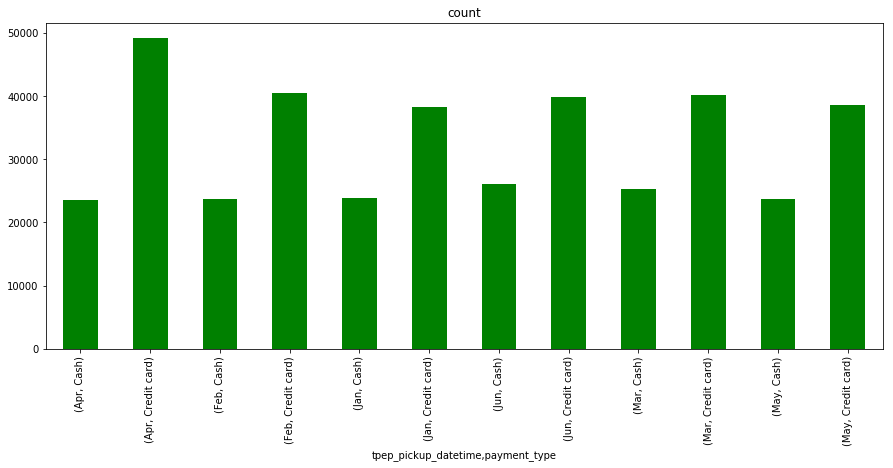

In [81]:
%matplotlib inline
df2.plot(subplots=True,kind='bar',x=['tpep_pickup_datetime','payment_type'],y='count',figsize=(15,6),legend=False,color=['g', 'b'])


In [77]:
print("We can clearly see from the figure above that credit card payment had the highest occurrence each month.")

We can clearly see from the figure above that credit card payment had the highest occurrence each month.


# Trip duration (travel time) to JFK airport per time of the day.

In [83]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['date'] = df['tpep_pickup_datetime'].dt.date
df['time'] = df['tpep_pickup_datetime'].dt.time
df1 = df.loc[df.RatecodeID == 2,['date','time','RatecodeID','duration']]
df1['RatecodeID'].replace(2,'JFK', inplace = True)
df1

,date,time,RatecodeID,duration
4,2016-02-10,13:34:00,JFK,00:48:00
5,2016-02-18,14:26:00,JFK,00:54:00
11,2016-02-02,17:19:00,JFK,00:00:00
67,2016-02-26,05:01:00,JFK,00:24:00
76,2016-02-01,15:57:00,JFK,01:18:00
78,2016-02-01,13:58:00,JFK,00:39:00
171,2016-02-01,19:49:00,JFK,00:27:00
185,2016-02-18,15:17:00,JFK,00:40:00
200,2016-02-15,13:08:00,JFK,00:38:00
212,2016-02-08,17:17:00,JFK,00:33:00
